In [26]:
%matplotlib inline

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
import seaborn as sn

#pour charger une image 
import matplotlib.image as mpimg

# 1. Expliquer le problème d’apprentissage

* Calssification des images

* Images de chiffres manuscrits à une définition de 8px * 8px

# 2. Présenter le dataset à travers une exploration bien structurée et commenter
- Qu’est ce qui différencie ce dataset de ceux que nous avons déjà manipuler

In [28]:
# chargement du dataset
digits = datasets.load_digits(as_frame=True) #Pour obtenir un dataFrame

In [29]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [30]:
# digits.data

## Exploration

In [31]:
# print(digits.DESCR)

In [32]:
# digits.data     #-- change selon as_frame=True ou False

In [33]:
# digits.feature_names

In [34]:
# digits.frame    #-- change selon as_frame=True ou False

In [35]:
# digits.target    #-- change selon as_frame=True ou False

In [36]:
# digits.images    # shape pour le taille de image    8 * 8

In [37]:
# digits.target

In [38]:
# digits.target_names    # size pour le nombre de classe

## différence entre ce dataset de ceux que nous avons déjà manipuler

*  Ici les X sont des images

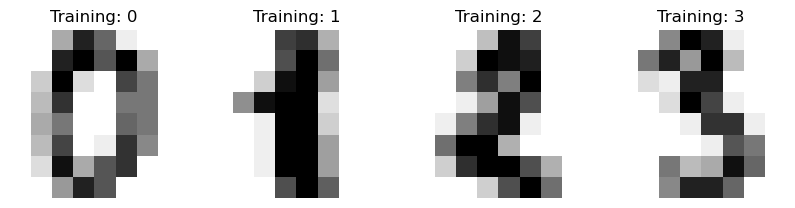

In [39]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

*  ils sont équivalent apres prétraitement

In [40]:
# digits.frame    #--  mettre as_frame à True

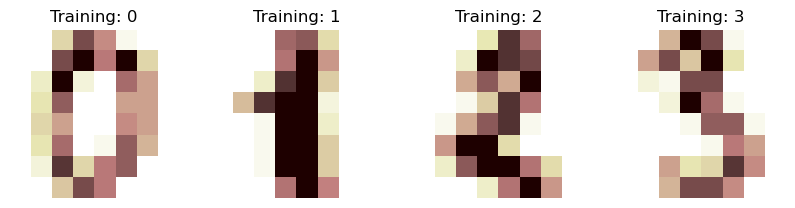

In [41]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.pink_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

# 3. Donner les détails de la phase d’apprentissage:
- Algo d’apprentissage

In [42]:
# flatten the images
n_samples = len(digits.images)


#mettre tous le pixels de image sur une ligne
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)


### Entraînement Avec SVM et SGD

In [43]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# classifier pour la descente de gradient stochastique
clf_SGD = SGDClassifier()   



# Learn the digits on the train subset
clf.fit(X_train, y_train)
clf_SGD.fit(X_train, y_train)


# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
predicted_SGD = clf_SGD.predict(X_test) 

# data

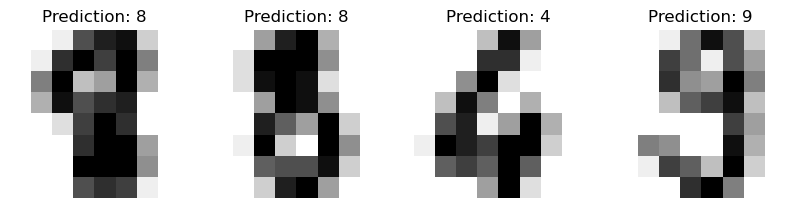

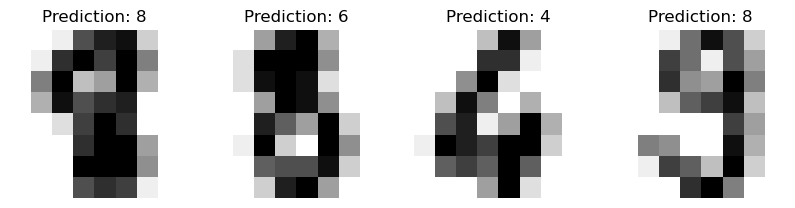

In [44]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction_SGD in zip(axes, X_test, predicted_SGD):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction_SGD}")


# 4. Expliquer les métriques d’évaluation

In [45]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




In [46]:
print(
    f"Classification report for SGD {clf_SGD}:\n"
    f"{metrics.classification_report(y_test,predicted_SGD)}\n"
)

Classification report for SGD SGDClassifier():
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        88
           1       0.96      0.86      0.91        91
           2       1.00      0.98      0.99        86
           3       0.89      0.84      0.86        91
           4       0.96      0.93      0.95        92
           5       0.80      0.96      0.87        91
           6       0.93      1.00      0.96        91
           7       0.96      0.92      0.94        89
           8       0.84      0.88      0.86        88
           9       0.92      0.88      0.90        92

    accuracy                           0.92       899
   macro avg       0.92      0.92      0.92       899
weighted avg       0.92      0.92      0.92       899




We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


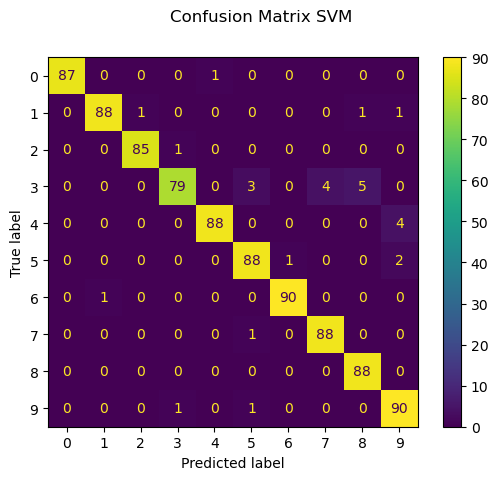

In [47]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix SVM")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Confusion matrix:
[[84  0  0  0  1  1  2  0  0  0]
 [ 0 78  0  5  1  0  1  0  4  2]
 [ 2  0 84  0  0  0  0  0  0  0]
 [ 0  0  0 76  0  6  0  2  6  1]
 [ 1  2  0  0 86  0  1  0  0  2]
 [ 0  0  0  0  0 87  2  0  0  2]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  1  5  0 82  1  0]
 [ 0  1  0  0  1  8  1  0 77  0]
 [ 0  0  0  4  0  2  0  1  4 81]]


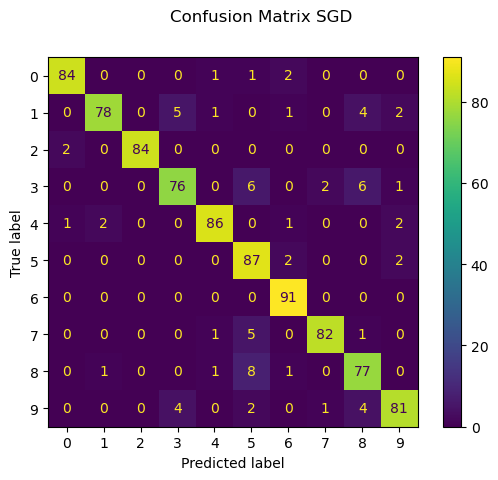

In [48]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted_SGD)
disp.figure_.suptitle("Confusion Matrix SGD")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [49]:
score_SVM = metrics.accuracy_score(y_test,y_pred=predicted)
score_SGD= metrics.accuracy_score(y_test,y_pred=predicted_SGD)

# log_loss_SVM = metrics.log_loss(y_test,y_pred=predicted)
# log_loss_SGD= metrics.log_loss(y_test,y_pred=predicted_SGD)


# hinge_loss_SVM = metrics.hinge_loss(y_test,predicted)
# hinge_loss_SGD= metrics.hinge_loss(y_test,predicted_SGD)


hamming_loss_SVM = metrics.hamming_loss(y_test,y_pred=predicted)
hamming_loss_SGD= metrics.hamming_loss(y_test,y_pred=predicted_SGD)


f1_score_SVM = metrics.f1_score(y_test,y_pred=predicted,average='weighted')
f1_score_SGD = metrics.f1_score(y_test,y_pred=predicted_SGD,average='weighted')



recall_score_SVM = metrics.recall_score(y_test,y_pred=predicted,average='weighted')
recall_score_SGD= metrics.recall_score(y_test,y_pred=predicted_SGD,average='weighted')



label  = ['score'  ,'hamming_loss', 'f1_score_SVM', 'recall_score','none']
valeur_SVM = [score_SVM  ,hamming_loss_SVM, f1_score_SVM , recall_score_SVM,0]
valeur_SGD = [score_SGD    ,hamming_loss_SGD, f1_score_SGD, recall_score_SGD,0]


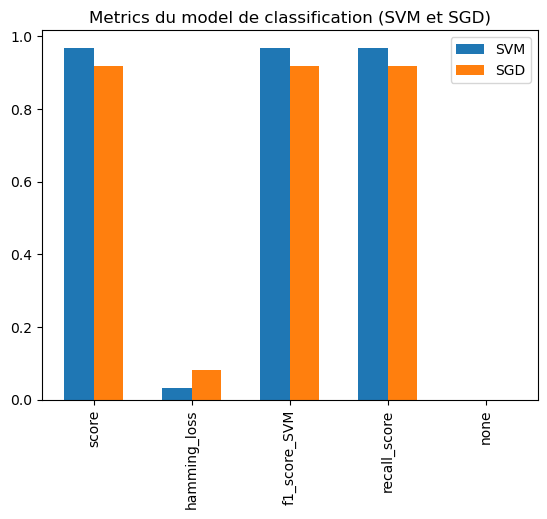

In [50]:
largeur_barre = 0.3
position_SVM = [i for i in range(len(valeur_SVM))]
position_SGD = [i + largeur_barre for i in range(len(valeur_SGD))]


plt.xticks([r + largeur_barre / 2 for r in range(len(valeur_SVM))], label)


plt.xticks(rotation= 'vertical')
plt.bar(position_SVM,valeur_SVM   ,width=largeur_barre)
plt.bar(position_SGD,valeur_SGD ,width=largeur_barre)
plt.legend(['SVM','SGD'],loc=1)
plt.title("Metrics du model de classification (SVM et SGD)");